In [1]:
import matplotlib.pyplot as plt
import numpy as np

"""
Verwendet solche code bitte nirgendwo, wo es zählt. Hier gehts nur darum das Prinzip zu zeigen ohne zu viel meiner Zeit zu investieren.
Insbesondere ist sowohl die Konstruktion von f_inv und die vectorization in der Art ausbaufähig / zu vermeiden :)
"""
N=1_000 # x-resolution
BINS=100 # Histogram resolution

In [2]:
def F(x): # Verteilungsfunktion
    if 0<=x<2: return x/6
    else: return 1/3+x/6

def f_inv(u,xs): # Berechnung der verallgemeinerten Linksinversen
    return min([x for x in xs if F(x)>=u],default=1)


In [3]:
xs=[4*i/N for i in range(N)] # [0,4] in regelmäßigen Abständen samplen
us=[i/N for i in range(N)]  # [0,4] in regelmäßigen Abständen samplen
fs=[F(x) for x in xs] 
finvs=[f_inv(u,xs) for u in us] 
random_sample=np.random.rand(N) # N Punkte aus Unif([0,1]) gesamplet
f_inv_vec=np.vectorize(lambda x: f_inv(x,xs)) # Nicht effizient, aber gut genug für ein Beispiel: https://stackoverflow.com/questions/35215161/most-efficient-way-to-map-function-over-numpy-array
F_hat=lambda x: np.sum(f_inv_vec(random_sample)<x)/N

# Mathematisch bestimmte Verteilungsfunktion

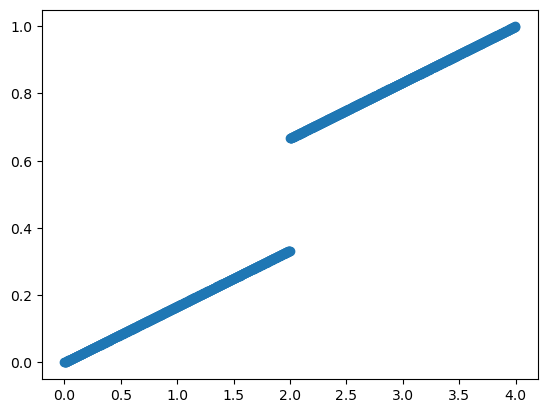

In [4]:
plt.scatter(xs,fs)
plt.show()

# Empirische Approximation der Verteilungsfunktion von $\underline{G}(u)$

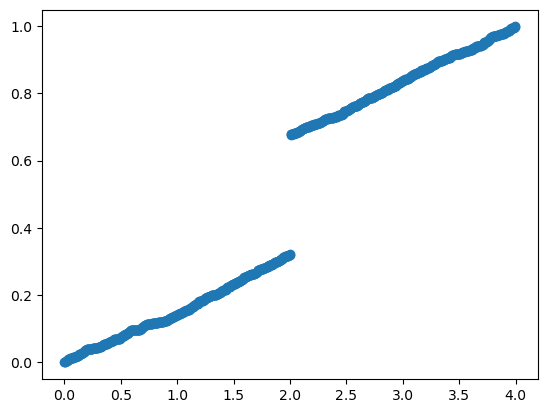

In [5]:
plt.scatter(xs,[F_hat(x) for x in xs])
plt.show()

# Verallgemeinerte Linksinverse

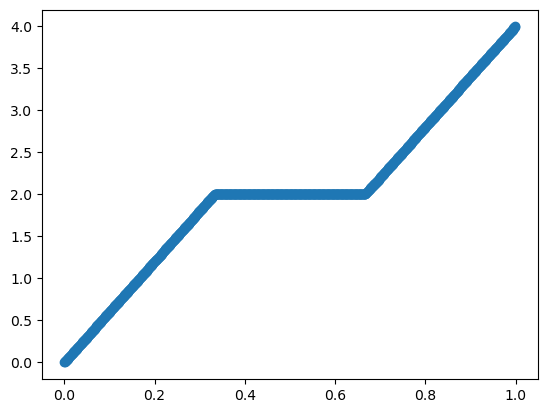

In [6]:
plt.scatter(us,finvs)
plt.show()

# Histogramm der gesampleten Werte mit Erwartungswertren zum Vergleich

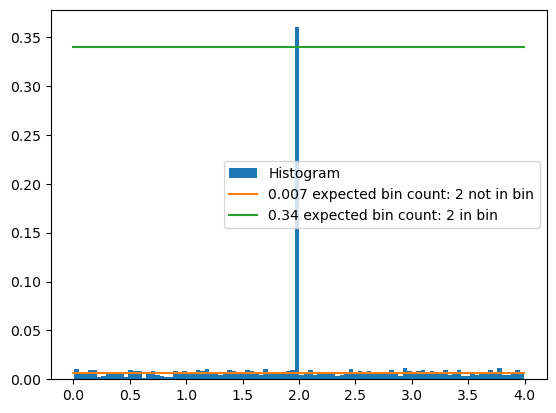

In [7]:
counts, bins = np.histogram([f_inv(x,xs) for x in random_sample],bins=BINS)
plt.hist(bins[:-1], bins, weights=counts/N,label="Histogram")
plt.plot(xs,[2/3/(BINS) for _ in xs],label=str(round((2/3)/(BINS),3))+" expected bin count: 2 not in bin")
plt.plot(xs,[1/3+2/3/(BINS)  for _ in xs],label=str(round(1/3+(2/3)/(BINS),3))+" expected bin count: 2 in bin")
plt.legend()
plt.show()